# PCA for MNIST dataset compression

### Download & Split the mnist dataset

In [2]:
from sklearn.datasets import fetch_openml
mnist = fetch_openml('mnist_784', version=1)

In [3]:
import matplotlib as mpl
import matplotlib.pyplot as plt
import numpy as np

mnist = mnist["data"]
mnist = mnist[:60000]

In [4]:
mnist.head()

,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,pixel10,...,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [5]:
mnist.shape

(60000, 784)

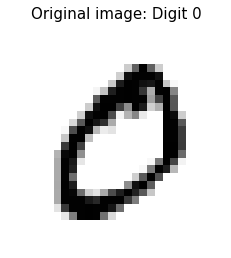

In [18]:
digit = mnist.iloc[1].values
digit_image = digit.reshape(28, 28)
plt.imshow(digit_image, cmap="binary")
plt.title('Original image: Digit {0}'.format(0), fontsize=15, pad=15)
plt.axis("off")
plt.show()

### Feature Scaling

Since our data is measured on a similar scale, we do not need to do feature scaling for PCA.

### Apply PCA

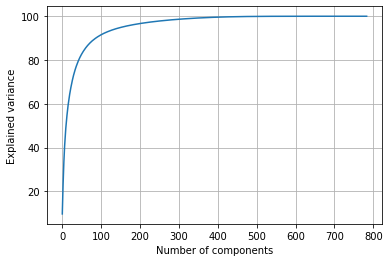

In [8]:
from sklearn.decomposition import PCA

pca_784 = PCA(n_components=784)
pca_784.fit(mnist)

plt.grid()
plt.plot(np.cumsum(pca_784.explained_variance_ratio_ * 100))
plt.xlabel('Number of components')
plt.ylabel('Explained variance')
plt.show()

#### Use the first 10 components to compress the image. 

[]

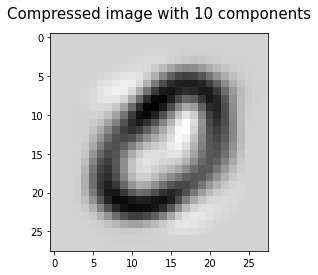

In [10]:
pca_10 = PCA(n_components=10)
mnist_pca_10_reduced = pca_10.fit_transform(mnist)
mnist_pca_10_recovered = pca_10.inverse_transform(mnist_pca_10_reduced)

image_pca_10 = mnist_pca_10_recovered[1,:].reshape([28,28])
plt.imshow(image_pca_10, cmap='gray_r')
plt.title('Compressed image with 10 components', fontsize=15, pad=15)
plt.plot()

In [14]:
np.cumsum(pca_10.explained_variance_ratio_ * 100)[-1]

48.8149699487493

#### Use 184 components to compress the image.

[]

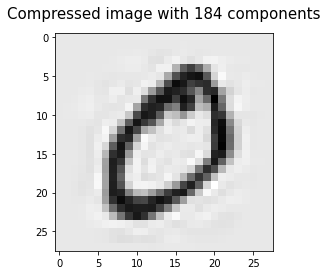

In [11]:
pca_184 = PCA(n_components=184)
mnist_pca_184_reduced = pca_184.fit_transform(mnist)
mnist_pca_184_recovered = pca_184.inverse_transform(mnist_pca_184_reduced)

image_pca_184 = mnist_pca_184_recovered[1,:].reshape([28,28])
plt.imshow(image_pca_184, cmap='gray_r')
plt.title('Compressed image with 184 components', fontsize=15, pad=15)
plt.plot()

In [15]:
np.cumsum(pca_184.explained_variance_ratio_ * 100)[-1]

96.12316200188037

#### Use 154 components to compress the image.

[]

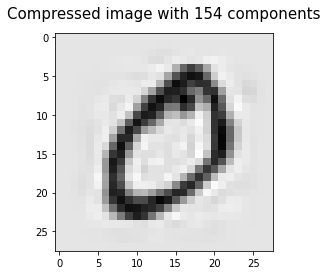

In [13]:
pca_154 = PCA(n_components=154)
mnist_pca_154_reduced = pca_154.fit_transform(mnist)
mnist_pca_154_recovered = pca_154.inverse_transform(mnist_pca_154_reduced)

image_pca_154 = mnist_pca_154_recovered[1,:].reshape([28,28])
plt.imshow(image_pca_154, cmap='gray_r')
plt.title('Compressed image with 154 components', fontsize=15, pad=15)
plt.plot()

In [16]:
np.cumsum(pca_154.explained_variance_ratio_ * 100)[-1]

94.98075404384005

In [ ]:
# X, y = mnist["data"], mnist["target"]
# y = y.astype(np.uint8)
# X_train, X_test, y_train, y_test = X[:60000], X[60000:], y[:60000], y[60000:]